In [2]:
import pandas as pd
from statsbombpy import sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotsoccer as mps

import socceraction.xthreat as xthreat
import socceraction.spadl as spadl
from PIL import Image
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)
from mplsoccer import FontManager , add_image

URL4 = 'https://github.com/google/fonts/blob/main/ofl/bungeeinline/BungeeInline-Regular.ttf?raw=true'
titulo = FontManager(URL4)

In [35]:
df = pd.read_excel('TODOSLOSEVENTOS.xlsx')

In [36]:
df.shape

(145241, 18)

In [37]:
df.end_x.min() , df.end_x.max()

(0.0, 100.0)

In [38]:
df.columns

Index(['game_id', 'event_id', 'minute', 'second', 'team_id', 'start_x',
       'start_y', 'player_id', 'end_x', 'end_y', 'isShot', 'isGoal', 'value',
       'displayName', 'type_id', 'type_name', 'result_id', 'result_name'],
      dtype='object')

In [39]:
df['start_x'] = df['start_x'] * 1.05
df['start_y'] = df['start_y'] * 0.68
df['end_x'] = df['end_x'] * 1.05
df['end_y'] = df['end_y'] * 0.68
df.isna().sum()

game_id             0
event_id            0
minute              0
second              0
team_id             0
start_x             0
start_y             0
player_id           0
end_x            3727
end_y            3727
isShot         141519
isGoal         144904
value               0
displayName         0
type_id             0
type_name           0
result_id           0
result_name         0
dtype: int64

In [40]:
df[['end_x','end_y']] = df[['end_x' , 'end_y']].fillna(0)

In [41]:
xTModel = xthreat.ExpectedThreat(l=12 , w=8)

In [42]:
xTModel.fit(df)

# iterations:  20


In [45]:
xTModel.save_model('xTGrid.json')

In [46]:
pd.read_json('xTGrid.json')

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.001004,0.001631,0.002018,0.002614,0.003356,0.004310,0.005666,0.007739,0.011035,0.013858,0.016610,0.027965
1,0.001423,0.002346,0.002645,0.002994,0.003886,0.004969,0.006731,0.008528,0.013081,0.017305,0.021793,0.021299
2,0.002156,0.002741,0.002981,0.003316,0.004242,0.005379,0.007317,0.009365,0.015479,0.026679,0.045030,0.044297
3,0.005171,0.003064,0.003038,0.003562,0.004319,0.005438,0.006868,0.010634,0.015131,0.037437,0.107524,0.237356
4,0.006005,0.003575,0.003035,0.003468,0.004248,0.005645,0.007063,0.009763,0.017501,0.039808,0.082725,0.205851
5,0.002160,0.002709,0.003009,0.003416,0.004294,0.005286,0.006965,0.009447,0.014625,0.021739,0.050838,0.042642
6,0.001553,0.002339,0.002759,0.003351,0.003888,0.005048,0.006604,0.009175,0.014863,0.018236,0.021528,0.027558
7,0.000991,0.001617,0.002231,0.002774,0.003514,0.004309,0.005692,0.007818,0.011625,0.014765,0.018562,0.027703


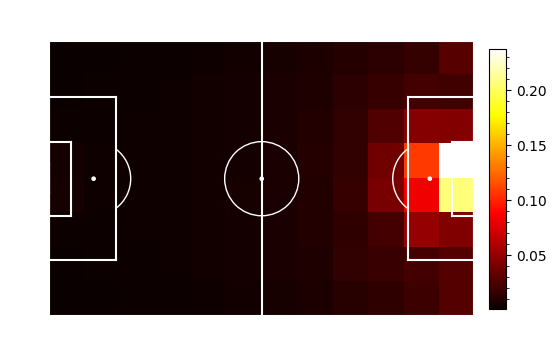

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2572\362428519.py:11: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular grids use `RegularGridInterpolator` instead.
        For scattered data, prefer `LinearNDInterpolator` or
        `CloughTocher2DInterpolator`.

        For more details see
        `https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  mps.heatmap(interp(x,y), cmap="hot", linecolor="white", cbar="True")


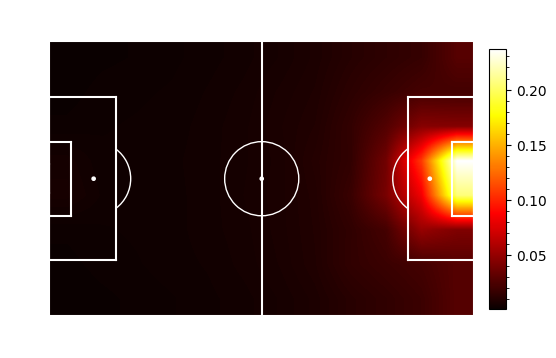

<Axes: >

In [47]:
import matplotsoccer as mps
import numpy as np
import matplotlib.pyplot as plt

mps.heatmap(xTModel.xT, cmap="hot", linecolor="white", cbar="True")

# Inspect the interpolated heatmap used for predictions
interp = xTModel.interpolator()
x = np.linspace(0, 105, 1050)
y = np.linspace(0, 68, 680)
mps.heatmap(interp(x,y), cmap="hot", linecolor="white", cbar="True")

In [48]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-08-17T23:51:11.837478,None,None,2023-08-17T23:51:11.837478
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
62,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
63,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
64,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-07-17T21:19:03.032991,2023-07-17T21:21:56.497106,2023-07-17T21:21:56.497106,2023-07-17T21:19:03.032991
65,72,107,International,Women's World Cup,female,False,True,2023,2023-09-01T12:34:19.705316,2023-09-01T12:35:45.762196,2023-09-01T12:35:45.762196,2023-09-01T12:34:19.705316


In [49]:
world_cup = sb.matches(competition_id=43 , season_id=106)

In [50]:
# Suponiendo que 'world_cup' es tu DataFrame
argentina_partidos_local = world_cup[world_cup['home_team'] == 'Argentina']
argentina_partidos_visitante = world_cup[world_cup['away_team'] == 'Argentina']

# Combinar los dos DataFrames usando el operador OR lógico
argentina_partidos = pd.concat([argentina_partidos_local, argentina_partidos_visitante], ignore_index=True)

# Mostrar el resultado
argentina_partidos


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
1,3869685,2022-12-18,17:00:00.000,International - FIFA World Cup,2022,Argentina,France,3,3,available,...,2023-08-17T15:55:15.164685,7,Final,Lusail Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Didier Deschamps,1.1.0,2,2
2,3857289,2022-11-26,21:00:00.000,International - FIFA World Cup,2022,Argentina,Mexico,2,0,available,...,2023-06-20T11:57:08.547882,2,Group Stage,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Gerardo Daniel Martino,1.1.0,2,2
3,3869519,2022-12-13,21:00:00.000,International - FIFA World Cup,2022,Argentina,Croatia,3,0,available,...,2023-04-26T22:32:37.808359,6,Semi-finals,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Zlatko Dalić,1.1.0,2,2
4,3857300,2022-11-22,12:00:00.000,International - FIFA World Cup,2022,Argentina,Saudi Arabia,1,2,available,...,2023-06-19T15:59:46.628887,1,Group Stage,Lusail Stadium,Slavko Vinčić,Lionel Sebastián Scaloni,Hervé Renard,1.1.0,2,2
5,3869321,2022-12-09,21:00:00.000,International - FIFA World Cup,2022,Netherlands,Argentina,2,2,available,...,2023-06-21T17:51:12.511460,5,Quarter-finals,Lusail Stadium,Antonio Miguel Mateu Lahoz,Louis van Gaal,Lionel Sebastián Scaloni,1.1.0,2,2
6,3857264,2022-11-30,21:00:00.000,International - FIFA World Cup,2022,Poland,Argentina,0,2,available,...,2023-07-25T09:10:13.832053,3,Group Stage,Stadium 974,Danny Desmond Makkelie,Czesław Michniewicz,Lionel Sebastián Scaloni,1.1.0,2,2


In [51]:
world_cup_mundial = sb.events(match_id=3869151)
world_cup_mundial.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_offensive', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_deflected', 'pass_end_location', 'pass_goal_assis

In [52]:
match_ids = [3869151, 3869685, 3857289, 3869519, 3857300, 3869321, 3857264]
all_event_dfs = []
for match_id in match_ids:
    # Obtener los eventos para un partido específico
    events_df = sb.events(match_id=match_id)

    desired_columns = ['id', 'minute', 'player', 'team', 'type', 'location', 'pass_end_location', 'pass_outcome', 'carry_end_location']
    filtered_events_df = events_df[desired_columns]
    
    filtered_events_df = filtered_events_df[filtered_events_df['type'].isin(['Pass', 'Carry'])]
    filtered_events_df = filtered_events_df[filtered_events_df['team'] == 'Argentina']



    # Agregar el DataFrame filtrado a la lista
    all_event_dfs.append(filtered_events_df)

# Concatenar todos los DataFrames en uno solo
world_cup_mundial = pd.concat(all_event_dfs, ignore_index=True)
world_cup_mundial


,id,minute,player,team,type,location,pass_end_location,pass_outcome,carry_end_location
0,3d36902b-b360-4b51-8d45-8349227d10d9,0,Enzo Fernandez,Argentina,Pass,"[8.0, 25.9]","[27.5, 23.4]",NaN,NaN
1,de401bb5-dd0f-4cb5-b0dc-958f487a28af,0,Lionel Andrés Messi Cuccittini,Argentina,Pass,"[27.2, 21.5]","[30.2, 13.0]",NaN,NaN
2,aa236156-a5f4-4a47-9b1e-70f77cf15492,0,Alejandro Darío Gómez,Argentina,Pass,"[35.2, 10.5]","[29.1, 4.8]",NaN,NaN
3,0033e752-d348-40df-b752-2912fb400240,0,Marcos Javier Acuña,Argentina,Pass,"[26.4, 2.1]","[16.0, 17.6]",NaN,NaN
4,e0f396d0-7a4c-46f1-9e89-e95e8217cd6d,0,Nicolás Hernán Otamendi,Argentina,Pass,"[14.1, 18.0]","[14.1, 44.5]",NaN,NaN
...,...,...,...,...,...,...,...,...,...
8373,bcd5e0ef-1ef7-4602-9fb4-ce37d028beb0,95,Leandro Daniel Paredes,Argentina,Carry,"[74.9, 10.0]",NaN,NaN,"[74.9, 11.5]"
8374,24fc4a10-5d0b-41b2-9c37-85e46b5c2889,95,Cristian Gabriel Romero,Argentina,Carry,"[75.4, 60.7]",NaN,NaN,"[75.4, 60.7]"
8375,c03ce4df-4ca4-4634-b3fa-47bc2371eca8,95,Lionel Andrés Messi Cuccittini,Argentina,Carry,"[72.6, 53.8]",NaN,NaN,"[87.3, 69.9]"
8376,6ca59e1f-38d2-40a6-969f-847b52dc15a7,95,Nahuel Molina Lucero,Argentina,Carry,"[94.0, 73.7]",NaN,NaN,"[93.1, 73.7]"


In [53]:
world_cup_mundial[['x', 'y']] = world_cup_mundial['location'].apply(lambda x: pd.Series(x))
world_cup_mundial[['Pass_end_x', 'Pass_end_y']] = world_cup_mundial['pass_end_location'].apply(lambda x: pd.Series(x))
world_cup_mundial[['Carry_end_x', 'Carry_end_y']] = world_cup_mundial['carry_end_location'].apply(lambda x: pd.Series(x))
world_cup_mundial.head()

,id,minute,player,team,type,location,pass_end_location,pass_outcome,carry_end_location,x,y,Pass_end_x,Pass_end_y,Carry_end_x,Carry_end_y
0,3d36902b-b360-4b51-8d45-8349227d10d9,0,Enzo Fernandez,Argentina,Pass,"[8.0, 25.9]","[27.5, 23.4]",NaN,NaN,8.0,25.9,27.5,23.4,NaN,NaN
1,de401bb5-dd0f-4cb5-b0dc-958f487a28af,0,Lionel Andrés Messi Cuccittini,Argentina,Pass,"[27.2, 21.5]","[30.2, 13.0]",NaN,NaN,27.2,21.5,30.2,13.0,NaN,NaN
2,aa236156-a5f4-4a47-9b1e-70f77cf15492,0,Alejandro Darío Gómez,Argentina,Pass,"[35.2, 10.5]","[29.1, 4.8]",NaN,NaN,35.2,10.5,29.1,4.8,NaN,NaN
3,0033e752-d348-40df-b752-2912fb400240,0,Marcos Javier Acuña,Argentina,Pass,"[26.4, 2.1]","[16.0, 17.6]",NaN,NaN,26.4,2.1,16.0,17.6,NaN,NaN
4,e0f396d0-7a4c-46f1-9e89-e95e8217cd6d,0,Nicolás Hernán Otamendi,Argentina,Pass,"[14.1, 18.0]","[14.1, 44.5]",NaN,NaN,14.1,18.0,14.1,44.5,NaN,NaN


In [54]:
xT = pd.read_json("xTGrid.json")
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

xT

array([[0.00100412, 0.00163066, 0.00201817, 0.00261378, 0.00335554,
        0.00431047, 0.00566596, 0.00773879, 0.01103532, 0.01385846,
        0.01660961, 0.02796474],
       [0.00142335, 0.00234554, 0.00264533, 0.00299408, 0.00388564,
        0.00496942, 0.00673125, 0.0085277 , 0.01308126, 0.01730524,
        0.02179296, 0.02129918],
       [0.00215615, 0.00274081, 0.00298119, 0.00331612, 0.00424181,
        0.00537905, 0.00731742, 0.00936493, 0.01547894, 0.0266786 ,
        0.04502984, 0.04429714],
       [0.00517145, 0.00306417, 0.00303775, 0.00356215, 0.00431911,
        0.00543826, 0.00686787, 0.01063442, 0.01513067, 0.03743678,
        0.10752435, 0.23735558],
       [0.00600467, 0.00357492, 0.00303471, 0.00346824, 0.00424769,
        0.00564524, 0.00706259, 0.00976342, 0.01750147, 0.03980799,
        0.08272458, 0.20585138],
       [0.00216022, 0.00270948, 0.00300883, 0.00341558, 0.00429425,
        0.00528598, 0.00696451, 0.00944674, 0.0146249 , 0.02173926,
        0.05083752,

In [55]:
def xT(df, type):
    xT = pd.read_json("xTGrid.json")
    xT = np.array(xT)
    xT_rows, xT_cols = xT.shape
    if type not in ['Pass', 'Carry']:
        raise ValueError("El parámetro type solo acepta 'Pass' o 'Carry'")
    
    df_xT = df[df['type'] == f'{type}']
    df_xT = df_xT.dropna(subset=['x', 'y', f'{type}_end_x', f'{type}_end_y'])

    df_xT['x1_bin'] = pd.cut(df_xT['x'], bins=xT_cols, labels=False)
    df_xT['y1_bin'] = pd.cut(df_xT['y'], bins=xT_rows, labels=False)

    df_xT['x2_bin'] = pd.cut(df_xT[f'{type}_end_x'], bins=xT_cols, labels=False)
    df_xT['y2_bin'] = pd.cut(df_xT[f'{type}_end_y'], bins=xT_rows, labels=False)

    if type == 'Pass':
        df_xT = df_xT.loc[(df_xT['pass_outcome'].isna())]

    df_xT['x1_bin'] = df_xT['x1_bin'].astype(int)
    df_xT['y1_bin'] = df_xT['y1_bin'].astype(int)
    df_xT['x2_bin'] = df_xT['x2_bin'].astype(int)
    df_xT['y2_bin'] = df_xT['y2_bin'].astype(int)
    
    df_xT['start_zone_value'] = df_xT[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
    df_xT['end_zone_value'] = df_xT[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
    df_xT['xT'] = df_xT['end_zone_value'] - df_xT['start_zone_value']
    df_xT = df_xT[['player', 'team', 'minute','type', 'x', 'y', f'{type}_end_x', f'{type}_end_y', 'xT']]
    return df_xT 

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2572\1138456274.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resultado = df_concatenado.groupby('player').sum()['xT'].sort_values(ascending=True)


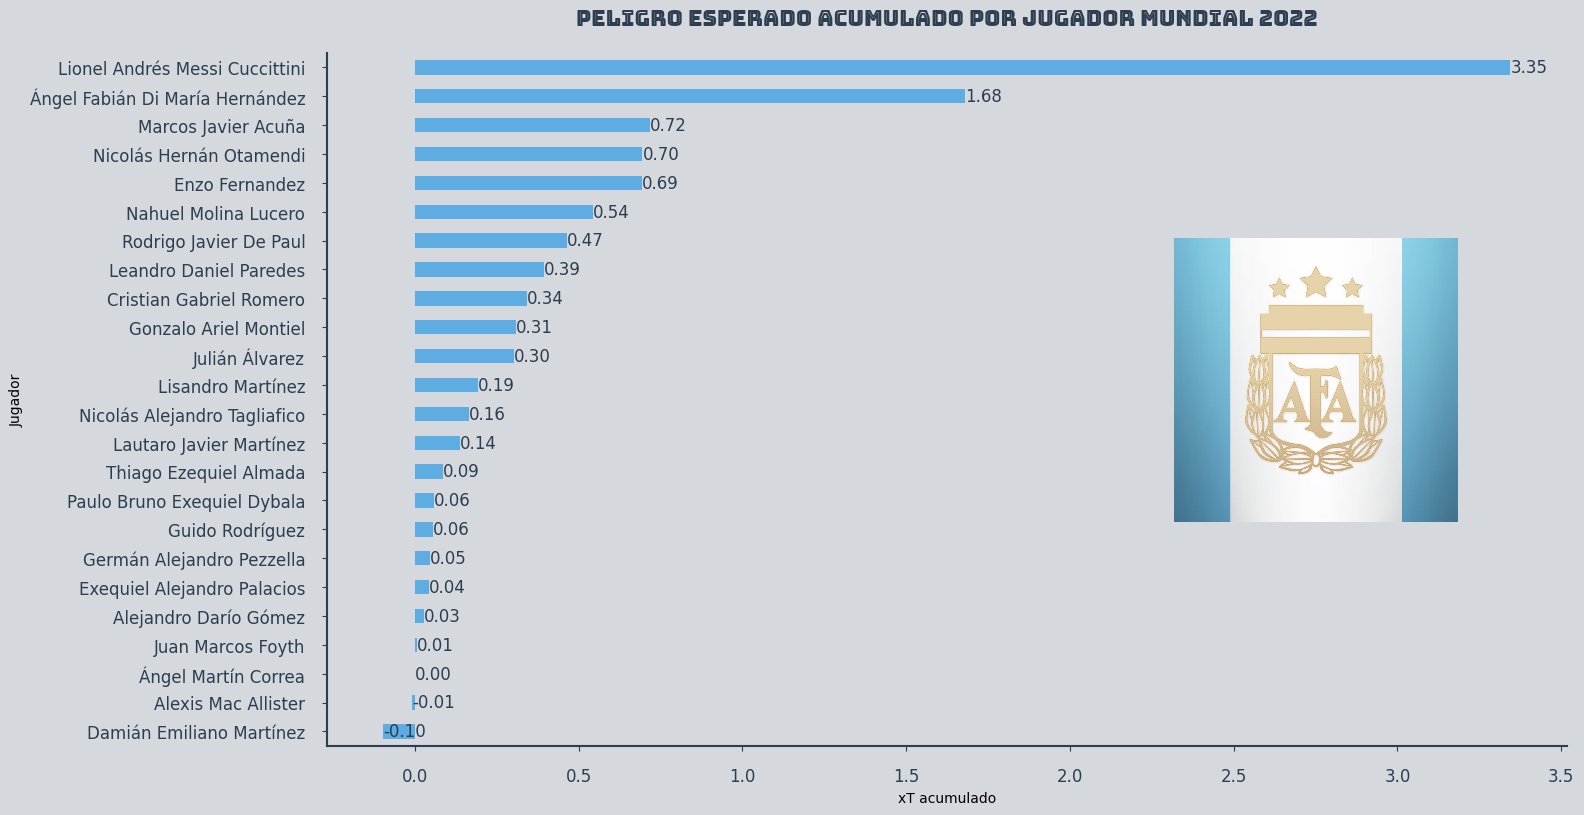

In [56]:
df1 = xT(world_cup_mundial, type='Carry')
df2 = xT(world_cup_mundial, type='Pass')
df_concatenado = pd.concat([df1, df2])

df_resultado = df_concatenado.groupby('player').sum()['xT'].sort_values(ascending=True)

fig , ax = plt.subplots(figsize =(16,9))

df_resultado.plot(kind='barh', color='#5DADE2')
plt.title('Peligro Esperado acumulado por jugador mundial 2022')
plt.xlabel('xT acumulado')
plt.ylabel('Jugador')
 # Detalles estéticos
color_plot = '#2C3E50'
facecolor = '#D5D8DC'

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(color_plot)
ax.spines['left'].set_color(color_plot)

fig.patch.set_facecolor(facecolor)
ax.set_facecolor(facecolor)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
    ax.yaxis.set_tick_params(pad=12, colors=color_plot, labelsize=12)
    ax.xaxis.set_tick_params(pad=12, colors=color_plot, labelsize=12)

    ax.set_title('Peligro Esperado acumulado por jugador mundial 2022',fontproperties=titulo.prop, color=color_plot, fontsize=16, pad=20)

    # Ruta del logo de Argentina
logo_path = 'C:/Users/USUARIO/OneDrive/Escritorio/data_Analyst_Soccer/LogoArgentina/logoArgentina.jpg'

# Función para mostrar el logo en el gráfico
def mostrar_logo(ax):
    logo = plt.imread(logo_path)
    # Posición del logo en el gráfico (ajusta según sea necesario)
    logo_pos = (2.75, 12.15)


    # Añadir el logo al gráfico
    imagebox = OffsetImage(logo, zoom=0.3)
    ab = AnnotationBbox(imagebox, logo_pos, frameon=False, pad=0)
    ax.add_artist(ab)

# Añadir la función para mostrar el logo antes de plt.show()
mostrar_logo(ax)

# Añadir etiquetas de valor en las barras
for i, value in enumerate(df_resultado):
    ax.text(value, i, f'{value:.2f}', ha='left', va='center', color=color_plot, fontsize=12)

plt.show()